In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using the training data, compute the number of samples
belonging to each class. Are the classes equally distributed?

In [45]:
#Constants
class1 = 1
class2 = 2

#Read the data from 'data_train.csv'
df_train= pd.read_csv('data_train.csv', header=None)
data_train = df_train.to_numpy()
print(df_train)

#Collect counts of the classes 
inClass1 = 0;
inClass2 = 0;

for row in data_train:
    if row[3] == class1:
        inClass1 += 1
    else:
        inClass2 += 1

print("Sample in class 1 is " + str(inClass1))
print("Sample in class 2 is " + str(inClass2))



      0   1   2  3
0    38  66   0  1
1    38  66  11  1
2    38  60   1  1
3    38  67   5  1
4    39  66   0  2
..   ..  ..  .. ..
240  75  62   1  1
241  76  67   0  1
242  77  65   3  1
243  78  65   1  2
244  83  58   2  2

[245 rows x 4 columns]
Sample in class 1 is 173
Sample in class 2 is 72


Using the training data, plot the histogram of each feature (i.e., 3 total histograms). How are the features distributed (e.g., unimodal, bimodal, uniform distributions)?

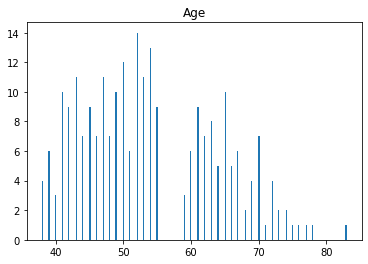

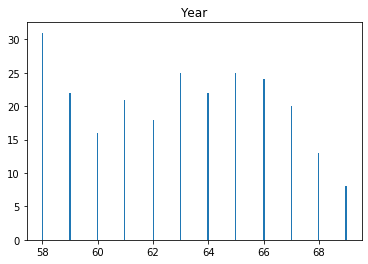

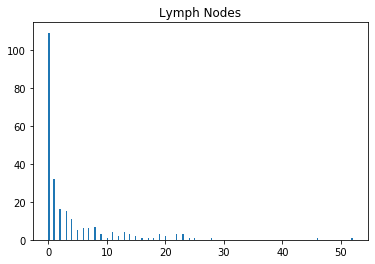

In [46]:
age = df_train[0].to_numpy()
year = df_train[1].to_numpy()
posLymphNodes = df_train[2].to_numpy()

plt.hist(age, bins=len(age))
plt.title('Age')
plt.show()

plt.hist(year, bins=len(year))
plt.title('Year')
plt.show()

plt.hist(posLymphNodes, bins=len(posLymphNodes))
plt.title('Lymph Nodes')
plt.show()

Using the training data, plot scatter plots of all pairs of features (i.e., 3 total scatter plots). Use a color-coding to indicate the class in which the samples belong to (e.g., blue circle for class 1, green star for class 2). What do you observe? How separable do the classes look? Are there feature combinations for which the two classes are more separable?

In [50]:
# Create two tuples for the colors of each class
one = (0, 0, 1)
two = (0, 1, 0)

#Separate each feature into respective classes 
age_one = []
age_two = []

year_one = []
year_two = []

posLymphNodes_one = []
posLymphNodes_two = []

class_one = []
class_two = []

#Load each feature based on the class
for row in data_train:
    if row[3] == class1:
        age_one.append(row[0])
        year_one.append(row[1])
        posLymphNodes_one.append(row[2])
        class_one.append(one)
    else:
        age_two.append(row[0])
        year_two.append(row[1])
        posLymphNodes_two.append(row[2])
        class_two.append(two)

Text(0.5, 1.0, 'Age vs Year')

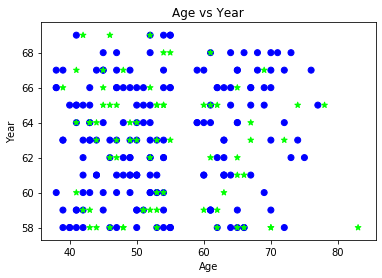

In [48]:
plt.scatter(
    x=age_one,
    y=year_one,
    c=class_one,
)
plt.scatter(
    x=age_two,
    y=year_two,
    c=class_two,
    marker='*'
)
plt.xlabel("Age")
plt.ylabel("Year")
plt.title("Age vs Year")

Text(0.5, 1.0, 'Age vs Lymph Nodes')

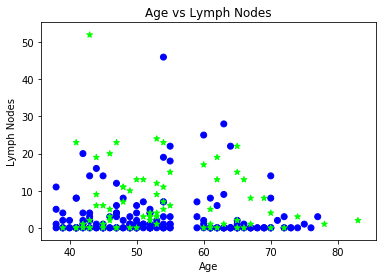

In [26]:
plt.scatter(
    x=age_one,
    y=posLymphNodes_one,
    c=class_one,
)
plt.scatter(
    x=age_two,
    y=posLymphNodes_two,
    c=class_two,
    marker='*'
)
plt.xlabel("Age")
plt.ylabel("Lymph Nodes")
plt.title("Age vs Lymph Nodes")

Text(0.5, 1.0, 'Year vs Lymph Nodes')

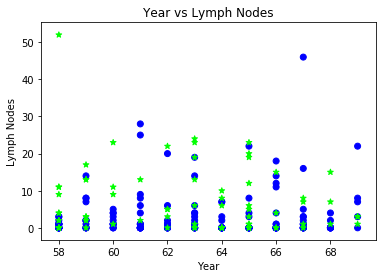

In [27]:
plt.scatter(
    x=year_one,
    y=posLymphNodes_one,
    c=class_one,
)
plt.scatter(
    x=year_two,
    y=posLymphNodes_two,
    c=class_two,
    marker='*'
)
plt.xlabel("Year")
plt.ylabel("Lymph Nodes")
plt.title("Year vs Lymph Nodes")

Implement a K-Nearest Neighbor classifier (K-NN) using the euclidean distance (l2-norm) as a distance measure to classify between the three classes.


In [39]:
def euclidean_distance(a, b):
    dist = 0.0
    for i in range(len(a) - 1):
        dist += (a[i] - b[i]) ** 2
    return dist ** (1/2)

def manhattan_distance(a, b):  # This is the L1-norm
    dist = 0.0
    for i in range(len(a) - 1):
        dist += abs(a[i] - b[i])
    return dist

def k_neighbors(train, test_, k, distance_alg):
    norms = [(train_, distance_alg(train_, test_)) for train_ in train]
    norms.sort(key=lambda t: t[1])
    top_k = [norms[i][0] for i in range(k)]
    return top_k

def predict_class(train, test_, k, distance_alg):
    neighbors = k_neighbors(train, test_, k, distance_alg)
    output = [t[-1] for t in neighbors]
    prediction = max(set(output), key=output.count)
    return prediction

def k_nearest_neighbors(train, test, k, distance_alg):
    predictions = [predict_class(train, test_, k, distance_alg) for test_ in test]
    return predictions

def accuracy(actual, predictions):
    correct = 0
    for i in range(len(actual)):
        correct += 1 if actual[i] == predictions[i] else 0
    return (correct / len(actual)) * 100.0

def batch_accuracy(actual, predictions):
    ones_correct = 0
    twos_correct = 0
    total_ones = 0
    total_twos = 0
    for a in actual:
        if a == 1:
            total_ones += 1
        else:
            total_twos += 1
    
    for i in range(len(actual)):
        if actual[i] == 1 and actual[i] == predictions[i]:
            ones_correct += 1
        elif actual[i] == 2 and actual[i] == predictions[i]:
            twos_correct += 1
            
    return (0.5 * (ones_correct / float(total_ones)) + 0.5 * (twos_correct / float(total_twos))) * 100.0
    
    

Explore different values of K = 1, 3, 5, 7, 9, 11. You will train one model for each of the six values of K using the train data and compute the classification accuracy (Acc) and balanced classification accuract (BAcc) of the model on the development set. Plot the Acc and BAcc metrics on the dev set against the different values of K. Please report the best hyper-parameter K∗based on the Acc metric and the best hyper-parameter K∗∗based on the BAcc metric. Please implement this procedure, including computing the accuracy metrics, from scratch and do not use available libraries. Hint: Acc = # correctly classified samples / # samples BAcc = 0.5 ·# correctly classified samples from class 1 / # samples from class 1 + 0.5 ·# correctly classified samples from class 2 / # samples from class 2

In [40]:
df_dev = pd.read_csv('data_dev.csv')
data_dev = df_dev.to_numpy()

train = data_train
test = data_dev

K = [1, 3, 5, 7, 9, 11]
# k=5 is the best hyper-parameter 
for k in K:
    predictions = k_nearest_neighbors(train, test, k, euclidean_distance)
    actual = [row[-1] for row in test]
    print(predictions)
    print(actual)

    acc = accuracy(actual, predictions)
    bacc = batch_accuracy(actual, predictions)
    print('Acc: ' + str(acc) + '%')
    print('B-Acc: ' + str(bacc) + '%')
    print('\n\n')

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Acc: 86.20689655172413%
B-Acc: 48.07692307692308%



[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Acc: 86.20689655172413%
B-Acc: 48.07692307692308%



[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Acc: 89.65517241379311%
B-Acc: 64.74358974358975%



[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Acc: 86.20689655172413%
B-Acc: 48.07692307692308%



[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Report the Acc and BAcc metrics on the test set using K∗and K∗∗.

In [41]:
# Use k = 5 on test
# for the test data
df_test = pd.read_csv('data_test.csv')
data_test = df_test.to_numpy()

train = data_train
test = data_test

k = 5
predictions = k_nearest_neighbors(train, test, k, euclidean_distance)
actual = [row[-1] for row in test]
print(predictions)
print(actual)

acc = accuracy(actual, predictions)
bacc = batch_accuracy(actual, predictions)
print('Acc: ' + str(acc) + '%')
print('B-Acc: ' + str(bacc) + '%')
print('\n\n')

[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
Acc: 83.33333333333334%
B-Acc: 64.58333333333334%





Instead of using the euclidean distance, experiment with the l1-norm (i.e.,
Manhattan distance) for K = 1, 3, 5, 7. Report your findings.

In [42]:
# Experiment with Manhattan Distance
K = [1, 3, 5, 7]

train = data_train
test = data_dev

for k in K:
    predictions = k_nearest_neighbors(train, test, k, manhattan_distance)
    actual = [row[-1] for row in test]
    print(predictions)
    print(actual)

    acc = accuracy(actual, predictions)
    bacc = batch_accuracy(actual, predictions)
    print('Acc: ' + str(acc) + '%')
    print('B-Acc: ' + str(bacc) + '%')
    print('\n\n')

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Acc: 86.20689655172413%
B-Acc: 48.07692307692308%



[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Acc: 86.20689655172413%
B-Acc: 48.07692307692308%



[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Acc: 82.75862068965517%
B-Acc: 46.15384615384615%



[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Acc: 86.20689655172413%
B-Acc: 48.07692307692308%





In [53]:
# k = 1, 5, 7 performed the same 
# for the test data
K = [1]

train = data_train
test = data_test

for k in K:
    predictions = k_nearest_neighbors(train, test, k, manhattan_distance)
    actual = [row[-1] for row in test]
    print(predictions)
    print(actual)

    acc = accuracy(actual, predictions)
    bacc = batch_accuracy(actual, predictions)
    print('Acc: ' + str(acc) + '%')
    print('B-Acc: ' + str(bacc) + '%')
    print('\n\n')

[2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
Acc: 90.0%
B-Acc: 75.0%



